In [1]:
!python --version

Python 2.7.15 :: Anaconda, Inc.


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

# Reading csv file

In [3]:
df = pd.read_csv("run_or_walk.csv",sep=",",header="infer")

In [4]:
df.shape

(88588, 11)

In [5]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [6]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
date              88588 non-null object
time              88588 non-null object
username          88588 non-null object
wrist             88588 non-null int64
activity          88588 non-null int64
acceleration_x    88588 non-null float64
acceleration_y    88588 non-null float64
acceleration_z    88588 non-null float64
gyro_x            88588 non-null float64
gyro_y            88588 non-null float64
gyro_z            88588 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


# Plotting count of label 

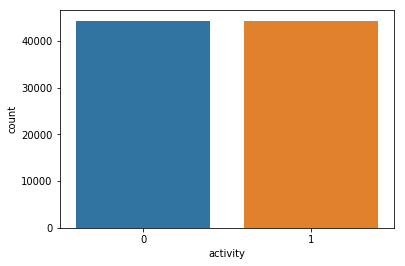

In [9]:
sns.countplot(df['activity'],label="Count")
plt.show()

# Splitting data between train and test

In [10]:
train,test = train_test_split(df,test_size=0.2,random_state=85)

In [11]:
len(df.columns)

11

In [18]:
x_train = train.iloc[:,5:11]
y_train = train['activity']
x_test = test.iloc[:,5:11]
y_test = test['activity']

# Creating Naive Bayes Gaussian model

In [23]:
gnb = GaussianNB()

In [24]:
y_pred = gnb.fit(x_train,y_train).predict(x_test)

In [25]:
print(metrics.accuracy_score(y_pred,y_test))

0.9558076532339993


# Plotting confusion matrix and classification report

In [26]:
from sklearn.metrics import confusion_matrix
cnf_matrix_gnb = confusion_matrix(y_test,y_pred)
print(cnf_matrix_gnb)

[[8745  101]
 [ 682 8190]]


In [28]:
print("Number of mislabeled points out of a total %d points : %d" % (test.shape[0],(y_test != y_pred).sum()))

Number of mislabeled points out of a total 17718 points : 783


# Selecting training data only with acceleration values as predictor

In [30]:
x_train1 = train.iloc[:,5:8]
y_train1 = train['activity']
x_test1 = test.iloc[:,5:8]
y_test1 = test['activity']

In [32]:
y_pred1 = gnb.fit(x_train1,y_train1).predict(x_test1)

In [33]:
print(metrics.accuracy_score(y_pred1,y_test1))

0.9573879670391692


# Selecting training data only with gyro values as predictor

In [38]:
x_train2 = train.iloc[:,8:11]
y_train2 = train['activity']
x_test2 = test.iloc[:,8:11]
y_test2 = test['activity']

In [39]:
y_pred2 = gnb.fit(x_train2,y_train2).predict(x_test2)

In [40]:
print(metrics.accuracy_score(y_pred2,y_test2))

0.6511457275087482
